In [1]:
import numpy as np
from numpy import pi, exp, sin, cos, sqrt
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt

In [2]:
rb = 1
lb = -1
N = 32

L = rb - lb
dx = L / N
x_data = np.linspace(lb, rb-dx, N)
X, Y = np.meshgrid(x_data, x_data, sparse=False) # can be sparsified

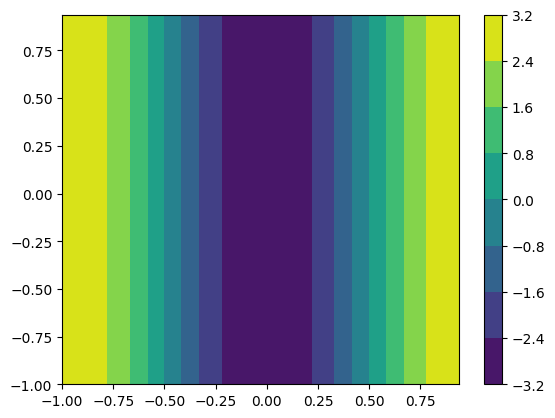

In [3]:
# Z = np.sin(pi * (X+1)) * np.cos(3 * pi * (Y+1))
Z = sin(2*pi*(X+1)/L) + 2 * cos(4*pi*(Y+1)/L)
Zx = 2 * pi / L * cos(2*pi*(X+1)/L)
Zy = -2 * 4 * pi / L  * sin(4*pi*(Y+1)/L)
# Z_lap = - 10 * pi**2 * Z
Z_lap = - pi**2 * np.sin(2*pi*(X+1)/L) - 2 * 4 * pi**2 * np.cos(4*pi*(Y+1)/L)
plt.contourf(X, Y, Zx)
plt.colorbar()

In [8]:
dy_coeff

array([[ 0.+0.j        ,  0.+0.j        ,  0.+0.j        , ...,
         0.+0.j        ,  0.+0.j        ,  0.+0.j        ],
       [ 0.+3.14159265j,  0.+3.14159265j,  0.+3.14159265j, ...,
         0.+3.14159265j,  0.+3.14159265j,  0.+3.14159265j],
       [ 0.+6.28318531j,  0.+6.28318531j,  0.+6.28318531j, ...,
         0.+6.28318531j,  0.+6.28318531j,  0.+6.28318531j],
       ...,
       [ 0.-9.42477796j,  0.-9.42477796j,  0.-9.42477796j, ...,
        -0.-9.42477796j, -0.-9.42477796j, -0.-9.42477796j],
       [ 0.-6.28318531j,  0.-6.28318531j,  0.-6.28318531j, ...,
        -0.-6.28318531j, -0.-6.28318531j, -0.-6.28318531j],
       [ 0.-3.14159265j,  0.-3.14159265j,  0.-3.14159265j, ...,
        -0.-3.14159265j, -0.-3.14159265j, -0.-3.14159265j]])

In [4]:
wave_number = np.concatenate((np.linspace(0, N/2-1, int(N/2)), np.linspace(-N/2, -1, int(N/2))))
k_1, k_2 = np.meshgrid(wave_number, wave_number, sparse=True)
d2_coeff = - 4 * pi**2 / L**2 * (k_1**2 + k_2**2)
dx_coeff = 2*pi*1j / L * k_1 + 0*k_2
dy_coeff = 2*pi*1j / L * k_2 + 0*k_1

c:\Users\jimmy\projects\high-res-qhd\.venv\Lib\site-packages\matplotlib\contour.py:1519: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
c:\Users\jimmy\projects\high-res-qhd\.venv\Lib\site-packages\matplotlib\contour.py:1520: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
c:\Users\jimmy\projects\high-res-qhd\.venv\Lib\site-packages\numpy\ma\core.py:2881: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


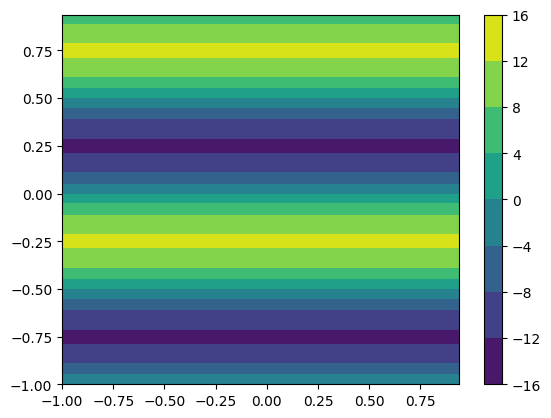

In [17]:
Zft = np.fft.fft2(Z)
Z1 = np.fft.ifft2(dy_coeff * np.fft.fft2(Z))
plt.contourf(X, Y, Z1)
plt.colorbar()

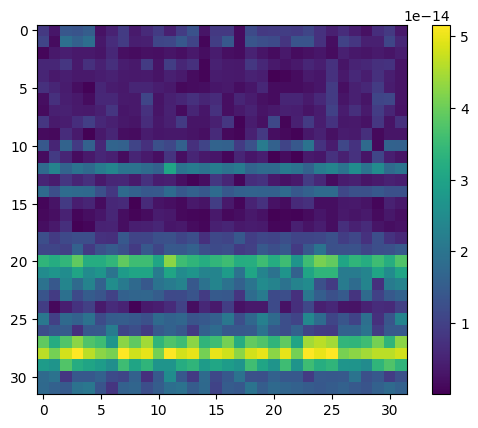

In [18]:
plt.imshow(np.abs(Z1 - Zy))
plt.colorbar()

# Simulating Schrodinger equations

In [ ]:
rb = 1
lb = -1
N = 128

L = rb - lb
dx = L / N
x_data = np.linspace(lb, rb-dx, N)
X, Y = np.meshgrid(x_data, x_data, sparse=False)
V = X**2 + 2 * Y**2

wave_number = np.concatenate((np.linspace(0, N/2-1, int(N/2)), np.linspace(-N/2, -1, int(N/2))))
k_1, k_2 = np.meshgrid(wave_number, wave_number, sparse=True)
d2_coeff = - 4 * pi**2 / L**2 * (k_1**2 + k_2**2)

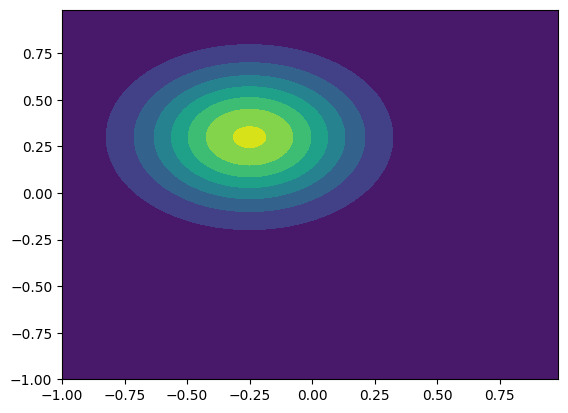

In [75]:
u0 = np.exp(-6 * (X+0.25)**2 - 8 * (Y-0.3)**2)
u0 = u0 / np.sum(u0**2) 
plt.contourf(X, Y, u0)

In [76]:
n_iter = 10000
T = 5
dt = T / n_iter
psi = u0
fval = np.zeros(n_iter)
tdep1 = lambda t: 1 / t**3
tdep2 = lambda t: t**3

for i in range(n_iter):
    t_temp = dt * (1+i)
    psi = exp(-1j*dt*tdep2(t_temp)*V) * psi 
    psi = ifft2(exp(1j*dt*tdep1(t_temp)*d2_coeff) * fft2(psi))
    prob = np.abs(psi)**2
    fval[i] = np.sum(prob * V)

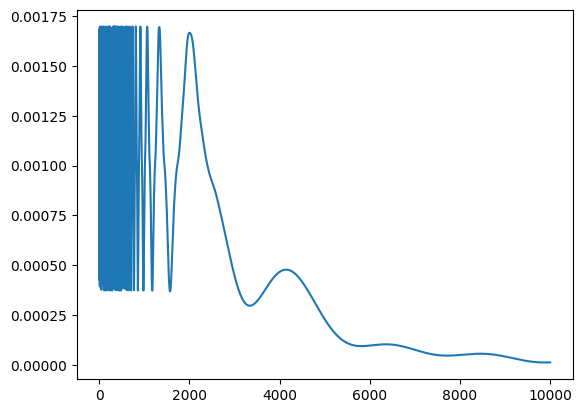

In [77]:
plt.plot(fval)

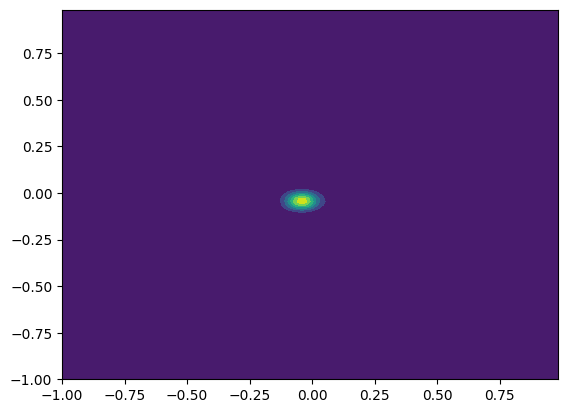

In [78]:
plt.contourf(X, Y, prob)

## Test ST function

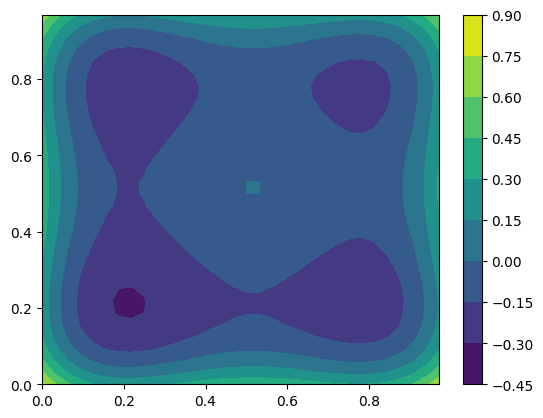

In [5]:
# rb = 5
# lb = -5
# N = 128
lb = 0
rb = 1
N = 32

L = rb - lb
dx = L / N
x_data = np.linspace(lb, rb-dx, N)
X, Y = np.meshgrid(x_data, x_data, sparse=False)
# Rosenbrock
# V = (1-X)**2 + 100 * (Y+1 - X**2)**2

# # ST function
# V = 1 * (X**4 - 16 * X**2 + 5 * X) + 1 * (Y**4 - 16 * Y**2 + 5 * Y)
# Gx = 1 * (4 * X**3 - 32*X + 5)
# Gy = 1 * (4 * Y**3 - 32*Y + 5)
# G2 = Gx**2 + Gy**2

c = 2e-3
V = c * ((10*X-5)**4 - 16 * (10*X-5)**2 + 5 * (10*X-5)) + c * ((10*Y-5)**4 - 16 * (10*Y-5)**2 + 5 * (10*Y-5))
Gx = 10*c * (4 * (10*X-5)**3 - 32*(10*X-5) + 5)
Gy = 10*c * (4 * (10*Y-5)**3 - 32*(10*Y-5) + 5)
G2 = Gx**2 + Gy**2

u0 = np.ones((N,N))
u0 = u0 / np.sqrt(np.sum(u0**2)) 
plt.contourf(X, Y, V)
plt.colorbar()

wave_number = np.concatenate((np.linspace(0, N/2-1, int(N/2)), np.linspace(-N/2, -1, int(N/2))))
k_1, k_2 = np.meshgrid(wave_number, wave_number, sparse=True)
d2_coeff = - 4 * pi**2 / L**2 * (k_1**2 + k_2**2)
dx_coeff = 2*pi*1j / L * k_1 + 0*k_2
dy_coeff = 2*pi*1j / L * k_2 + 0*k_1


In [6]:
# standard QHD

n_iter = 50000
T = 10
dt = T / n_iter
psi = u0
fval0 = np.zeros(n_iter)
tdep1 = lambda t: 1 / t**3
tdep2 = lambda t: t**3

for i in range(n_iter):
    t_temp = dt * (1+i)
    psi = exp(-1j*dt*tdep2(t_temp)*V) * psi 
    psi = ifft2(exp(1j*dt*tdep1(t_temp)*d2_coeff) * fft2(psi))
    prob = np.abs(psi)**2
    fval0[i] = np.sum(prob * V)

In [7]:
# high-res QHD

n_iter = 50000
T = 10
dt = T / n_iter
psi = u0
fval = np.zeros(n_iter)
prob_norm = np.zeros(n_iter)
# tdep1 = lambda t: 1 / t**3
# tdep2 = lambda t: t**3
s = 100
beta = 2e-3 * np.sqrt(s)
# s_t = lambda t: 100 / np.max([1, t])

for i in range(n_iter):
    t = dt * (1+i)
    # s = s_t(t)
    # beta = 0.01 * np.sqrt(s)

    a1 = (1 / t**3)
    a2 = 0.5 * beta 
    a3 = 0 # 0.5 * beta * (beta + np.sqrt(s)) * t**3
    a4 = t**3 + 1.5 * (2*beta + np.sqrt(s)) * t**2
    
    psi = exp(-1j*dt*(a3*G2 + a4*V)) * psi 
    psi = ifft2(exp(1j*dt*a1*d2_coeff) * fft2(psi))
    psi -= a2 * dt*(Gx * ifft2(dx_coeff * fft2(psi)) + ifft2(dx_coeff * fft2(Gx * psi)))
    psi -= a2 * dt*(Gy * ifft2(dy_coeff * fft2(psi)) + ifft2(dy_coeff * fft2(Gy * psi)))
    prob = np.abs(psi)**2
    prob_norm[i] = np.sum(prob)
    prob = prob / prob_norm[i]
    fval[i] = np.sum(prob * V)

In [402]:
# c = 0.01
# V = c * ((10*X-5)**4 - 16 * (10*X-5)**2 + 5 * (10*X-5)) + c * ((10*Y-5)**4 - 16 * (10*Y-5)**2 + 5 * (10*Y-5))
# Gx = 10*c * (4 * (10*X-5)**3 - 32*(10*X-5) + 5)
# Gy = 10*c * (4 * (10*Y-5)**3 - 32*(10*Y-5) + 5)

def fun(v):
    x = 10 * v[0] - 5
    y = 10 * v[1] - 5
    f = x**4 - 16*x**2 + 5*x + y**4 - 16*y**2 + 5*y
    return c * f


def grad(v):
    x = 10 * v[0] - 5
    y = 10 * v[1] - 5
    g1 = 4*x**3 - 32*x + 5
    g2 = 4*y**3 - 32*y + 5
    return 10 * c * np.array([g1, g2])


def gd(x0, n_iter, lr):
    fval = np.zeros(n_iter)
    x_temp = x0
    fval[0] = fun(x_temp)
    for i in range(n_iter-1):
        x_temp -= lr * grad(x_temp)
        x_temp = np.clip(x_temp, 0, 1)
        fval[i+1] = fun(x_temp)
    return fval 

def generate_samples(N, n_iter, lr):
    obj_vals = np.zeros((N, n_iter))

    for i in range(N): 
        v0 = np.random.rand(2)
        obj_vals[i] = gd(v0, n_iter, lr)
    return obj_vals 

sample_curves = generate_samples(100, 1000, 1e-3)

In [ ]:
# import time 

# t0 = time.time()
# psi = exp(-1j*dt*tdep2(t_temp)*V) * psi 
# t1 = time.time()
# print(t1 - t0)

0.006442546844482422


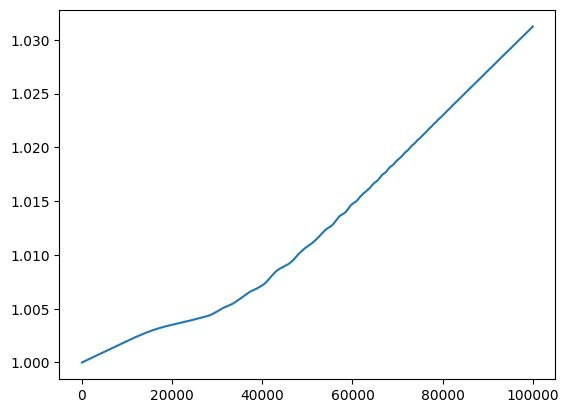

In [17]:
plt.plot(prob_norm)

-0.31221771240234375
0.012684615677762912
0.034872802976559536


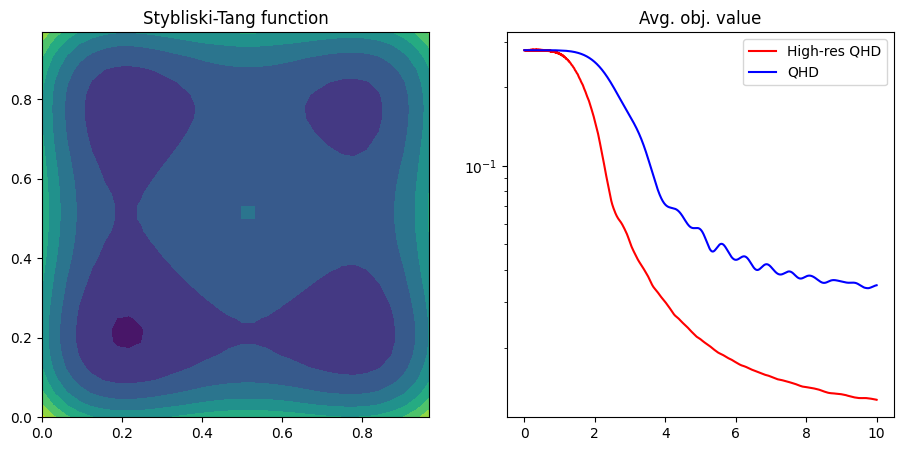

In [9]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(11,5))

ax1.contourf(X, Y, V)
ax1.set_title('Stybliski-Tang function')
# plt.colorbar()

plt.subplot(1,2,2)
fmin = np.min(V[:])
print(fmin)
# ax2.semilogy(np.linspace(0, 10, 1000), np.mean(sample_curves, axis=0)-fmin, '--', label='GD')
ax2.semilogy(np.linspace(0, 10, 50000), fval - fmin, 'r-', label='High-res QHD')
ax2.semilogy(np.linspace(1e-3, 10, 50000), fval0 - fmin, 'b-', label='QHD')
ax2.legend()
ax2.set_title('Avg. obj. value')
print(fval[-1] - fmin)
print(fval0[-1] - fmin)
# plt.savefig('st-obj.png', dpi=300)

# previous high-res qhd: 0.014913

In [249]:
indicator = (X < 0.5) * (Y < 0.5)
print(np.sum(indicator * prob))
# this is just for ST

0.5014511977890264


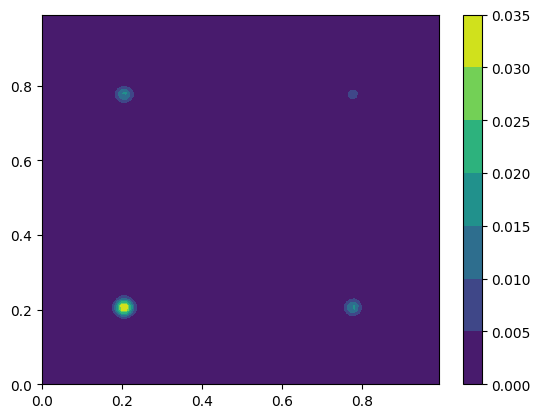

In [251]:
plt.contourf(X, Y, prob)
plt.colorbar()

In [4]:
# Alpine 2 function
# f = lambda x, y: sqrt(x*y) * sin(x) * sin(y)
# g1 = lambda x, y: (0.5 * sin(x) / sqrt(x) + sqrt(x) * cos(x)) * sqrt(y) * sin(y)
# g2 = lambda x, y: (0.5 * sin(y) / sqrt(y) + sqrt(y) * cos(y)) * sqrt(x) * sin(x)
# grad = [g1, g2]
# lb = 1
# rb = 10

lb = -2
rb = 2
N = 32

L = rb - lb
dx = L / N
x_data = np.linspace(lb, rb-dx, N)
X, Y = np.meshgrid(x_data, x_data, sparse=False)

# 
c = 1
V =  c * (cos(pi*X)**2 + 0.25 * X**4 + cos(pi*Y)**2 + 0.25 * Y**4)
Gx = c * (-2 * pi * cos(pi*X) * sin(pi*X) + X**3)
Gy = c * (-2 * pi * cos(pi*Y) * sin(pi*Y) + Y**3)
G2 = Gx**2 + Gy**2

In [5]:
Vy = ifft2(dy_coeff * fft2(V))
plt.contourf(X, Y, np.abs(Vy - Gy))
print(np.max(np.abs(Vy - Gy)))
plt.colorbar()

NameError: name 'dy_coeff' is not defined

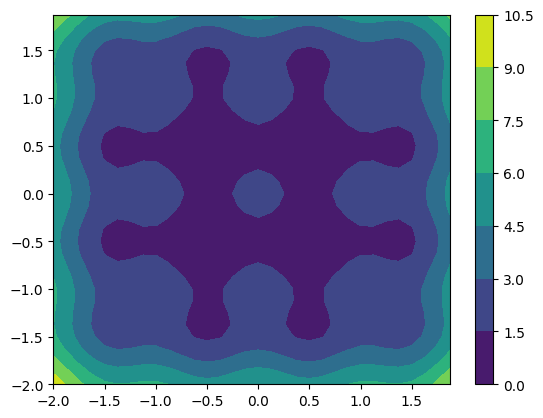

In [6]:
# u0 = np.exp(-3*(X-pi/2)**2 - 3*(Y-pi/2)**2)
u0 = np.ones((N,N))
u0 = u0 / np.sqrt(np.sum(u0**2)) 
plt.contourf(X, Y, V)
plt.colorbar()

wave_number = np.concatenate((np.linspace(0, N/2-1, int(N/2)), np.linspace(-N/2, -1, int(N/2))))
k_1, k_2 = np.meshgrid(wave_number, wave_number, sparse=True)
d2_coeff = - 4 * pi**2 / L**2 * (k_1**2 + k_2**2)
dx_coeff = 2*pi*1j / L * k_1 + 0*k_2
dy_coeff = 2*pi*1j / L * k_2 + 0*k_1

In [7]:
# standard QHD

n_iter = 50000
T = 10
dt = T / n_iter
psi = u0
fval0 = np.zeros(n_iter)
tdep1 = lambda t: 1 / t**3
tdep2 = lambda t: t**3

for i in range(n_iter):
    t_temp = dt * (1+i)
    psi = exp(-1j*dt*tdep2(t_temp)*V) * psi 
    psi = ifft2(exp(1j*dt*tdep1(t_temp)*d2_coeff) * fft2(psi))
    prob = np.abs(psi)**2
    fval0[i] = np.sum(prob * V)

In [69]:
# high-res QHD

n_iter = 50000
T = 10
dt = T / n_iter
psi = u0
fval = np.zeros(n_iter)
prob_norm = np.zeros(n_iter)
# tdep1 = lambda t: 1 / t**3
# tdep2 = lambda t: t**3
s = 0
# beta = 0.01 * np.sqrt(s)
beta = - 0.2
# s_t = lambda t: 10 / np.max([1, t])

for i in range(n_iter):
    t = dt * (1+i)
    # s = s_t(t)
    # beta = 0.01 * np.sqrt(s)

    a1 = (1 / t**3)
    a2 = 0.5 * beta 
    a3 = 0 # 0.5 * beta * (beta + np.sqrt(s)) * t**3
    a3 = 0.5 * beta * (beta + np.sqrt(s)) * t**3
    # a4 = t**3 + 1.5 * (2*beta + np.sqrt(s)) * t**2
    a4 = t**3 + (1 + 1.5 * np.sqrt(s)) * t**2
    
    psi = exp(-1j*dt*(a3*G2 + a4*V)) * psi 
    psi = ifft2(exp(1j*dt*a1*d2_coeff) * fft2(psi))
    psi -= a2 * dt*(Gx * ifft2(dx_coeff * fft2(psi)) + ifft2(dx_coeff * fft2(Gx * psi)))
    psi -= a2 * dt*(Gy * ifft2(dy_coeff * fft2(psi)) + ifft2(dy_coeff * fft2(Gy * psi)))
    prob = np.abs(psi)**2
    prob_norm[i] = np.sum(prob)
    prob = prob / prob_norm[i]
    fval[i] = np.sum(prob * V)

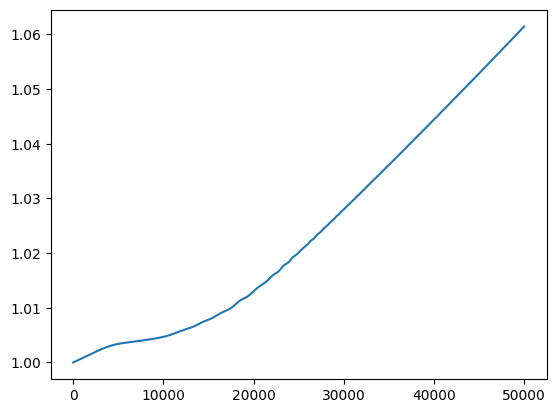

In [70]:
plt.plot(prob_norm)

In [434]:
def fun(v):
    x = v[0]
    y = v[1]
    f = cos(pi*x)**2 + 0.25 * x**4 + cos(pi*y)**2 + 0.25 * y**4
    return f


def grad(v):
    x = v[0]
    y = v[1]
    g1 = -2 * pi * cos(pi*x) * sin(pi*x) + x**3
    g2 = -2 * pi * cos(pi*y) * sin(pi*y) + y**3
    return np.array([g1, g2])


def gd(x0, n_iter, lr):
    fval = np.zeros(n_iter)
    x_temp = x0
    fval[0] = fun(x_temp)
    for i in range(n_iter-1):
        x_temp -= lr * grad(x_temp)
        x_temp = np.clip(x_temp, -2, 2)
        fval[i+1] = fun(x_temp)
    return fval 

def generate_samples(N, n_iter, lr):
    obj_vals = np.zeros((N, n_iter))

    for i in range(N): 
        v0 = -2 + 4 * np.random.rand(2)
        obj_vals[i] = gd(v0, n_iter, lr)
    return obj_vals 

sample_curves = generate_samples(100, 1000, 1e-3)

0.03125
0.044573270368939474
0.12402828680752406


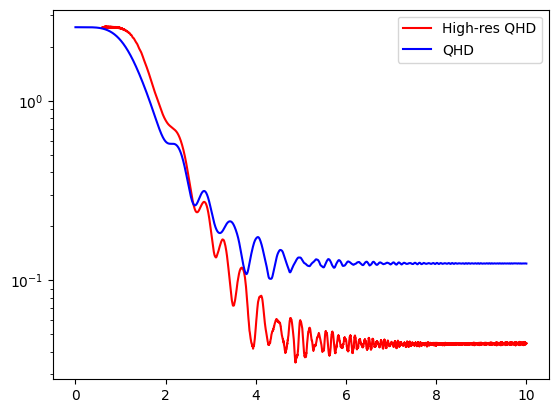

In [71]:
fmin = np.min(V[:])
print(fmin)
# plt.semilogy(np.linspace(0, 10, 1000), np.mean(sample_curves, axis=0)-fmin, '--', label='GD')
plt.semilogy(np.linspace(-3*beta, 10, 50000), fval - fmin, 'r-', label='High-res QHD')
plt.semilogy(np.linspace(1e-3, 10, 50000), fval0 - fmin, 'b-', label='QHD')
plt.legend()
print(fval[-1] - fmin)
print(fval0[-1] - fmin)

# previous high-res qhd: 0.0016995

0.03125
0.0026744175529012995
0.07979292638517263


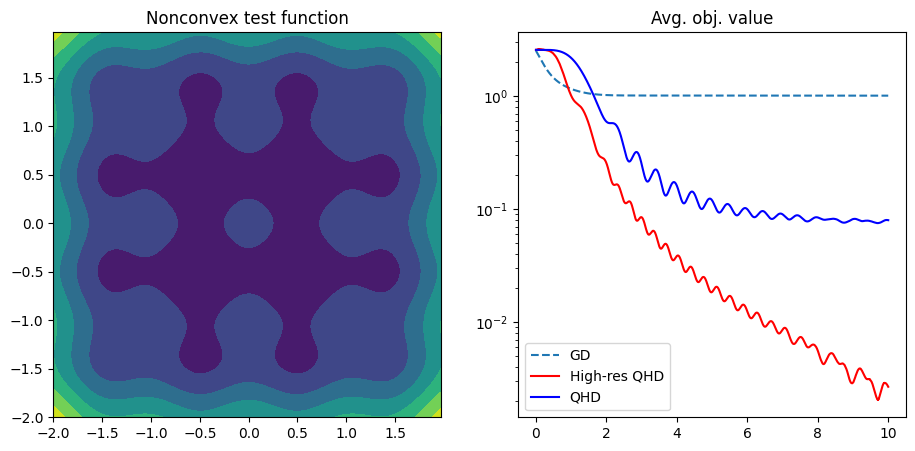

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(11,5))

ax1.contourf(X, Y, V)
ax1.set_title('Nonconvex test function')
# plt.colorbar()

plt.subplot(1,2,2)
fmin = np.min(V[:])
print(fmin)
ax2.semilogy(np.linspace(0, 10, 1000), np.mean(sample_curves, axis=0)-fmin, '--', label='GD')
ax2.semilogy(np.linspace(0, 10, 50000), fval - fmin, 'r-', label='High-res QHD')
ax2.semilogy(np.linspace(0, 10, 50000), fval0 - fmin, 'b-', label='QHD')
ax2.legend()
ax2.set_title('Avg. obj. value')
print(fval[-1] - fmin)
print(fval0[-1] - fmin)
# plt.savefig('nonconvex-obj.png', dpi=300)

In [337]:
indicator = (X > 0.7) * (Y > 0.7)
print(np.sum(indicator * prob))
# this is just for Alpine 2

0.0050052537723211405
